# Seaborn

Seaborn was
- built from matplotlib
- Integrated for pandas structures

# Basic structure

sns."*chart type*"(
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data="*dataset*",
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x="*data in x axis*",
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y="*data in y axis*",
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;hue="*grouping variable*"
)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=["A", "B", "C"], y=[1,3,2])
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

# Chart types in seaborn

![Picture title](image-20221124-114526.png)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#loading our data
#this data represents tips in a restaurant vs other variables
tips = sns.load_dataset('tips')
print(tips.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## histogram (.displot())

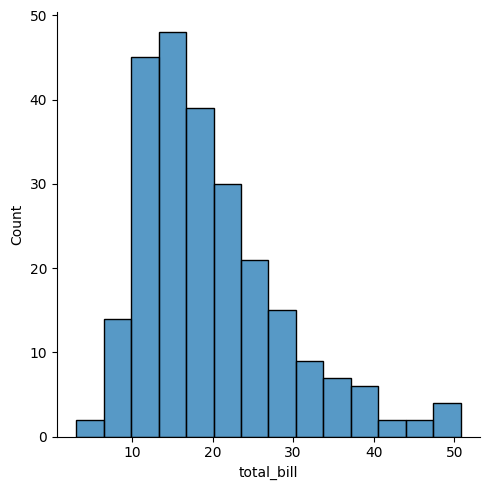

In [3]:
sns.displot(data=tips, x="total_bill")
plt.show()

## scatter plot (.scatterplot())

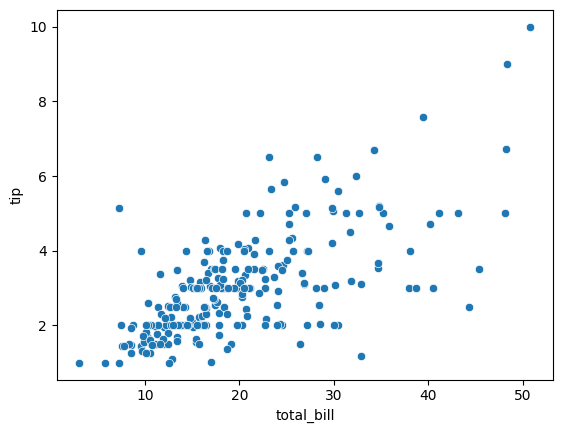

In [4]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

## lm plot (linear model)

this plot shows a correlation between two variables drawing a linear model on the chart

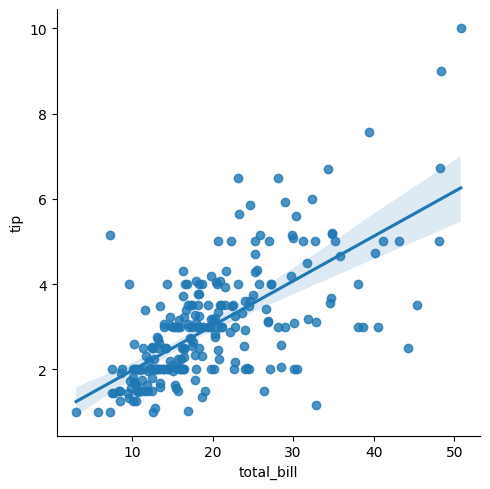

In [5]:
sns.lmplot(data=tips, x="total_bill", y="tip")
plt.show()

### Scatter plot with group by

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


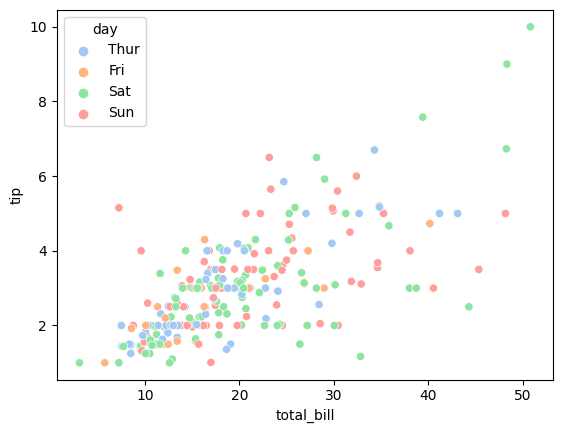

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset
tipsdata = sns.load_dataset("tips")
tipsdata.head()

#show dataset
print(tipsdata.head())

#scatter plot, segment tip % total_bill correlation by day
sns.scatterplot(data=tipsdata, x="total_bill", y="tip", hue="day", palette ="pastel")
plt.show()

### heatmap

In [7]:
# see the correlation among the variables
tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

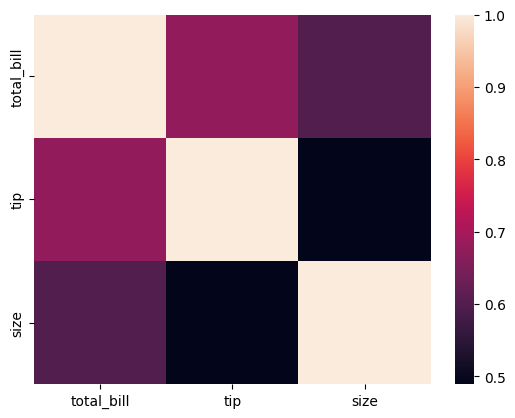

In [8]:
#heatmap of the correlations
sns.heatmap(tips.corr())

Se pueden agregar diferentes parámetros:
- annot muestra el valor de la correlación
- cmap color
- linewidthsespacio entre variables
- linecolor color de las líneas
- vminv, max valores máximos y mínimos
- cbar=False eliminar la barra

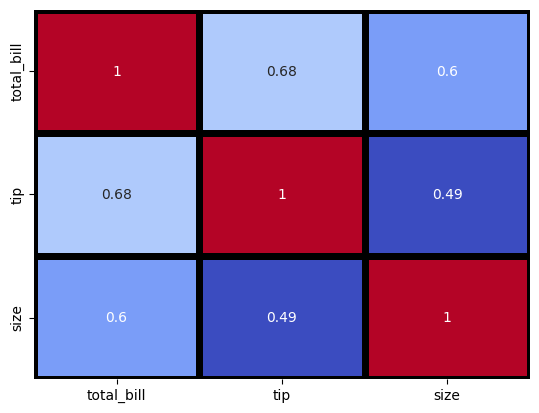

In [9]:
#heatmap of the correlations
sns.heatmap(tips.corr(), annot= True, cmap='coolwarm', linewidths=5, linecolor='black',
vmin=0.5,vmax=1,cbar=False);

## Kernel Density Estimation (KDE)

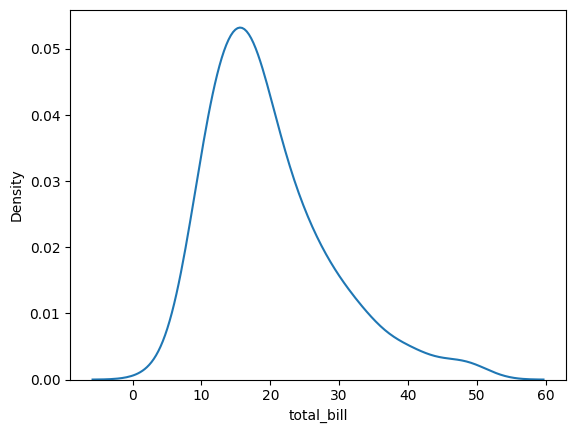

In [10]:
sns.kdeplot(data= tips, x= 'total_bill'); 

#In statistics, kernel density estimation (KDE) is the application of kernel smoothing for 
#probability density estimation, i.e., a non-parametric method to estimate the probability
#density function of a random variable based on kernels as weights.

## Change chart type (kind)

Remember the image of the seaborn chart categories

![Picture title](image-20221124-150953.png)

you can only change to a sub category if the main category corresponds in each case.

In [11]:
print(tips.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


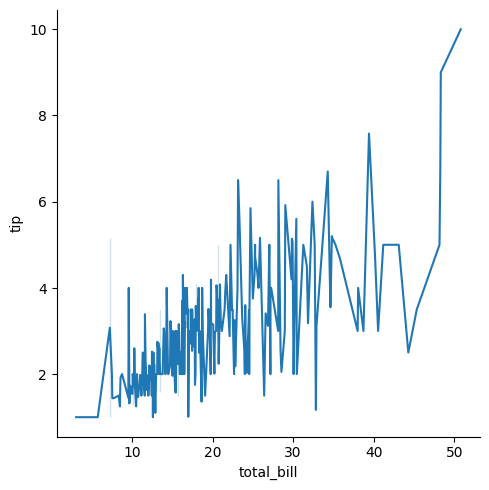

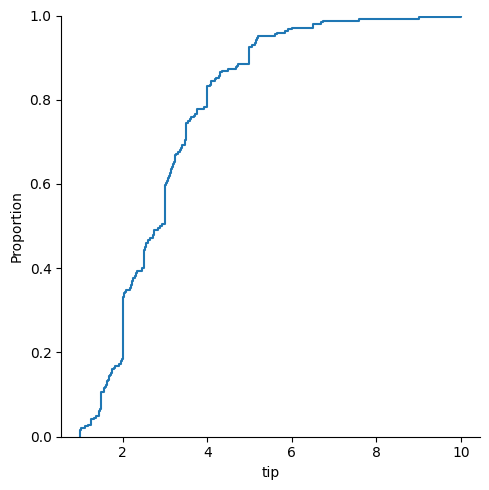

In [12]:
#Example

#lineplot is under relplot
sns.relplot(data=tips, x="total_bill", y="tip", kind="line")
plt.show()

#rugplot is under distplot
sns.displot(data=tips, x="tip", kind="ecdf")
plt.show()

## Remove Legend, change palette & transparency

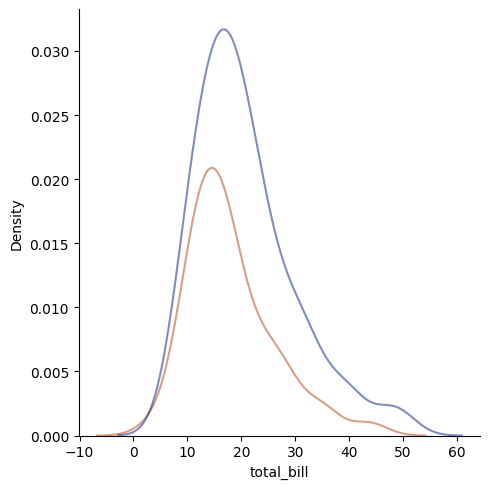

In [13]:
#note that the hue argument would add a legend of sex, but legend=False removed it.
#we also changed the line transparency with alpha=0.5
sns.displot(data= tips, x= 'total_bill', hue = 'sex', kind = 'kde', legend= False, palette='dark', alpha = .5)
plt.show()

# Group by (hue)

The argument **hue** allows you to do a segmentation in the chart, just as group by in pandas

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


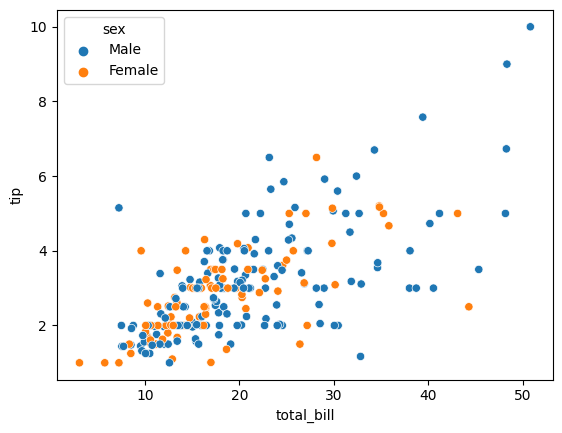

In [14]:
#let's use this data from the lesson above
print(tips.head(5))

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.show()

# Multiple charts

In this chapter see:
- how to create multiple charts one over the other
- how to create multiple charts one next to the other

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

#work with the following data
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## Combine charts (overlapping)

You can combine charts literally writing one line of code below the other.

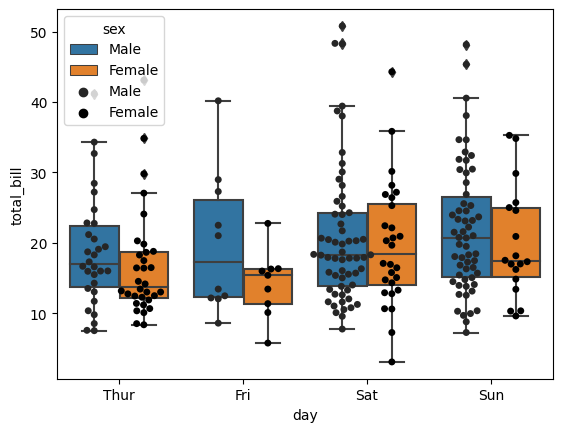

In [16]:
#first chart
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex", dodge=True)

#second chart
sns.swarmplot(data=tips,x="day",y="total_bill",hue="sex", palette='dark:0', dodge=True)
#the dodge argument is for the swarm plot to segment by sex

plt.show()

## One next to the other

the argument col separates the charts

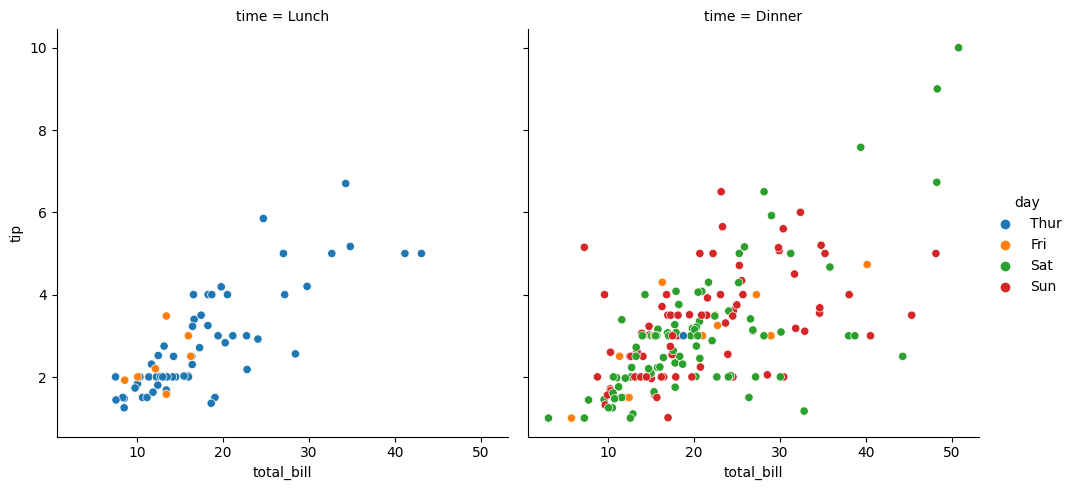

In [17]:
sns.relplot(data= tips, x= 'total_bill', y = 'tip',  hue= 'day', kind= 'scatter', col = 'time');


## Jointplot

Joinplot joins two different charts (not overlapping, nor one next to the other. see below for details)

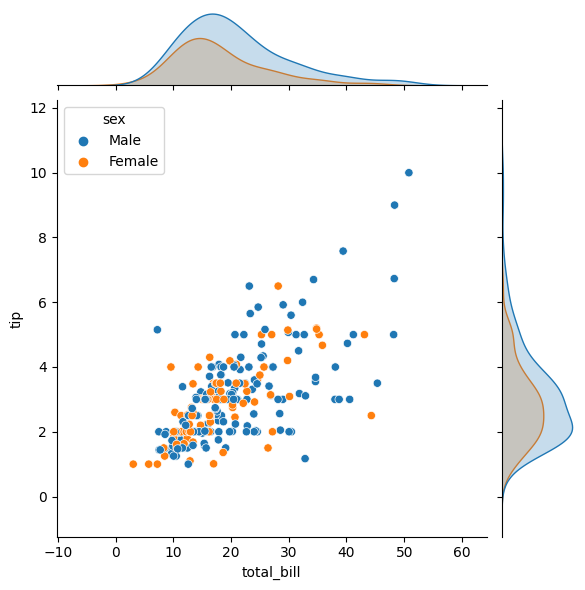

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#loading our data
tips = sns.load_dataset('tips')
tips.head()

#jointplot chart
sns.jointplot(data=tips, x="total_bill", y="tip", hue="sex", kind="scatter");
#with kind you edit the type of the main chart

You can **add more arguments to do a better analysis**

### marginal_ticks

marginal_ticks creates a table for the external chart

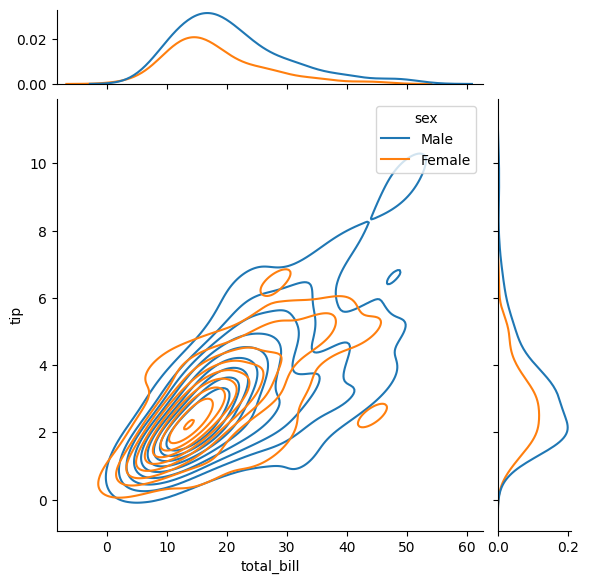

In [19]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="sex", kind="kde", marginal_ticks=True);

### marginal_kws

marginal_kws allos to modify determined parameters for the external chart

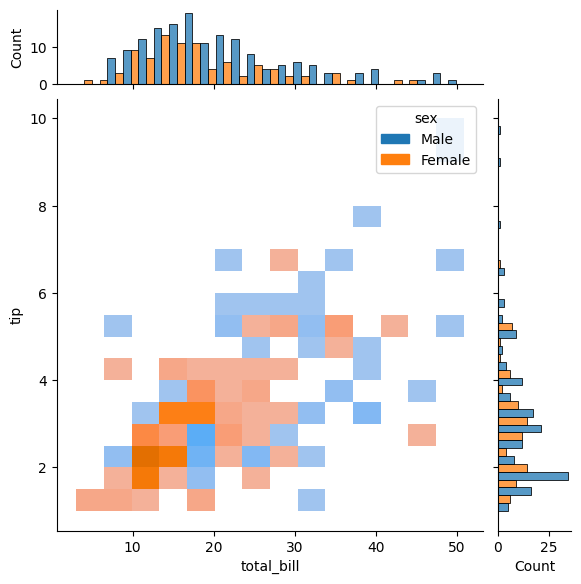

In [20]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="sex", kind="hist",
marginal_ticks=True,     #shows a small table for the external chart
marginal_kws=dict(bins= 25, fill = True, multiple= 'dodge')  #arguments only affect the external chart
)  

# Modify style,pallette & font (Set)

## Modify size

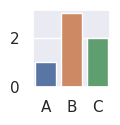

In [21]:
plt.figure(figsize=(1,1))

sns.set()
sns.barplot(x=["A", "B", "C"], y=[1,3,2])
plt.show()

## Set (modify style, pallette & font

Set allows to modify: 
- **style** and the 
- **font**
- **palette**
- **font scale**

simultaneously 

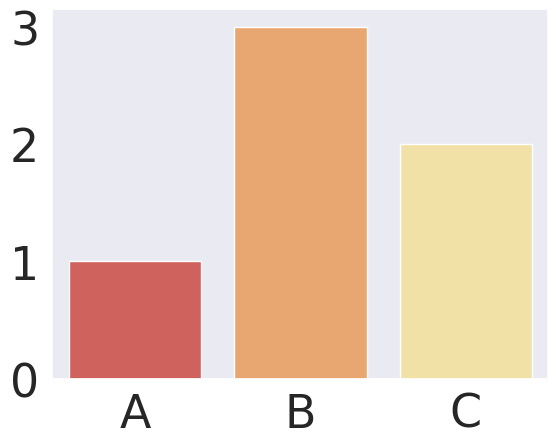

In [22]:
sns.set(style="dark", palette="Spectral", font_scale=3)
sns.barplot(x=["A", "B", "C"], y=[1,3,2])
plt.show()

i will restore the default styles settings by calling set() with no arguments

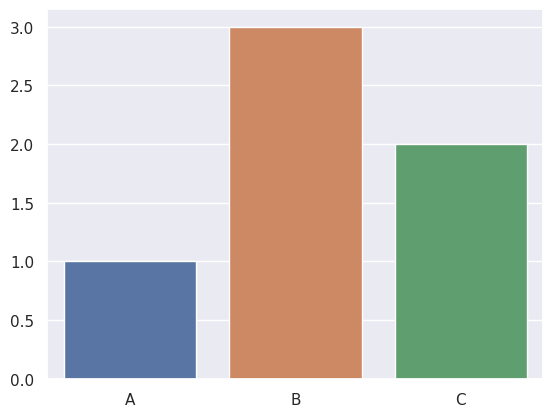

In [23]:
sns.set()
sns.barplot(x=["A", "B", "C"], y=[1,3,2])
plt.show()

## Seaborn color palletes

link:

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

some examples:

In [24]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

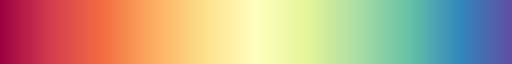

In [25]:
sns.color_palette("Spectral", as_cmap=True)

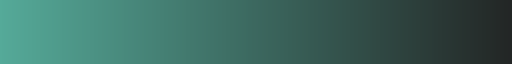

In [26]:
sns.color_palette("dark:#5A9_r", as_cmap=True)

In [27]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Seaborn themes

Link:

https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

# Save your chart as a png

Hola, si desean guardar los diagramas como imagen para descargarlos y usarlos en otro lado pueden usar el **plt.savefig(“name.png”)**

# Chart customization

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

tipsdata = sns.load_dataset("tips")
tipsdata.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Acumulative charts

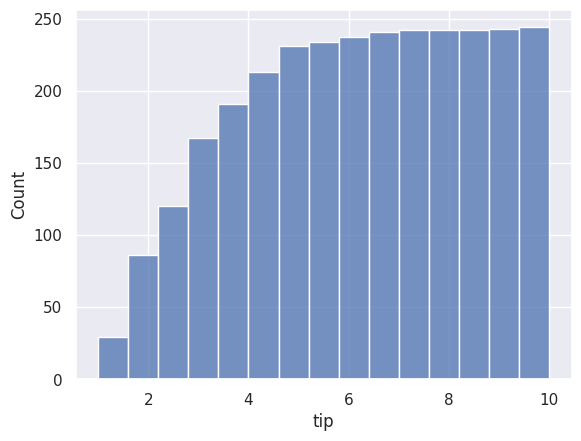

In [29]:
sns.histplot(data=tipsdata, x="tip", bins = 15, cumulative=True)
plt.show()

## Statistic charts

Argument is **stat()** and the options are:

['count', 'density', 'percent', 'probability' or 'frequency']

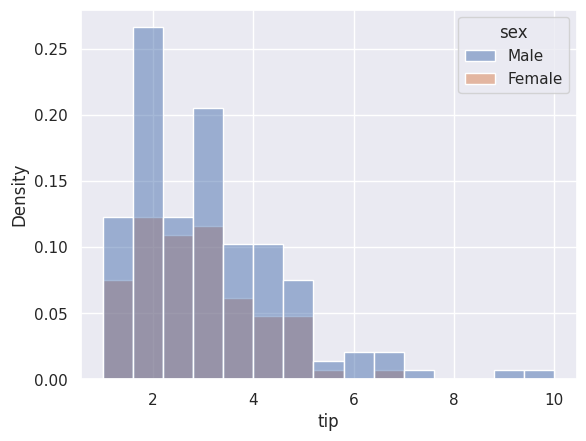

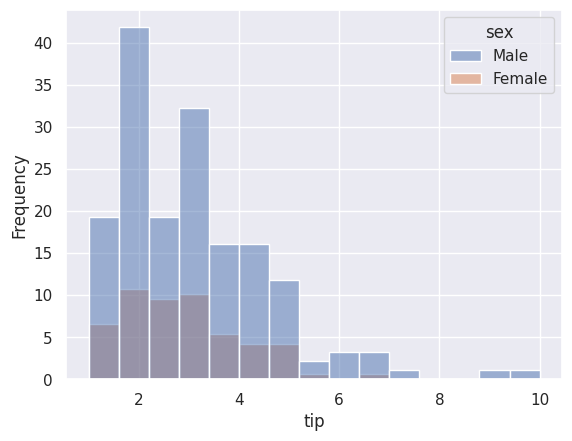

In [30]:
sns.histplot(data = tipsdata, x= 'tip', bins = 15, hue= 'sex', stat = 'density')
plt.show()

sns.histplot(data = tipsdata, x= 'tip', bins = 15, hue= 'sex', stat = 'frequency')
plt.show()

## Chart grouping

Argument is **multiple()** and the options are:

['layer', 'stack', 'fill', 'dodge']

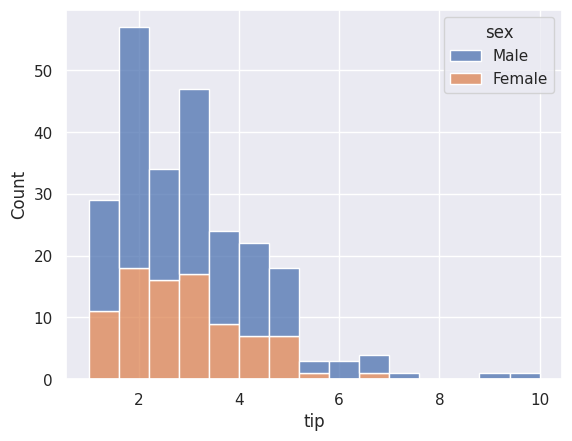

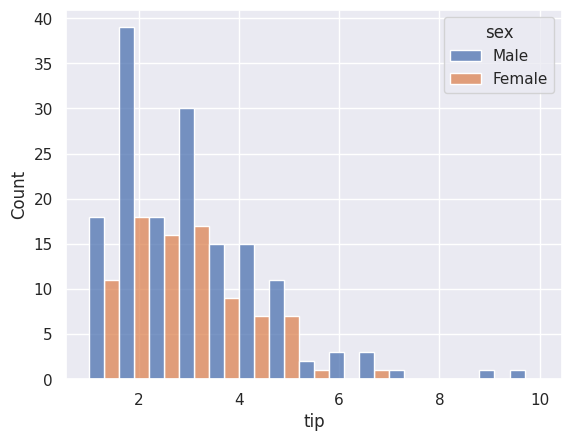

In [31]:
#first plot with stack
sns.histplot(data = tipsdata, x= 'tip', bins = 15, hue= 'sex', multiple = 'stack')
plt.show()

#second plot with dodge
sns.histplot(data = tipsdata, x= 'tip', bins = 15, hue= 'sex', multiple = 'dodge')
plt.show()

## Area below the curve

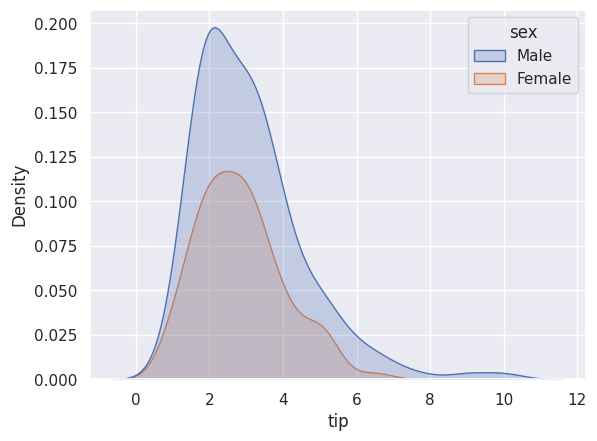

In [32]:
#first plot with stack
sns.kdeplot(data = tipsdata, x= 'tip', hue= 'sex', fill = True)
plt.show()

# Chart types for categorical data

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 

tips = sns.load_dataset('tips')
tips.head(2)

#the categorical variables are "sex", "smoker", "day", "time"

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Note that the **categorical variables** are **"sex", "smoker", "day", "time"**

## Catplot

catplot is useful to work with **categorical data**

this chart will let you to do a **double group by** or **double segmentation**

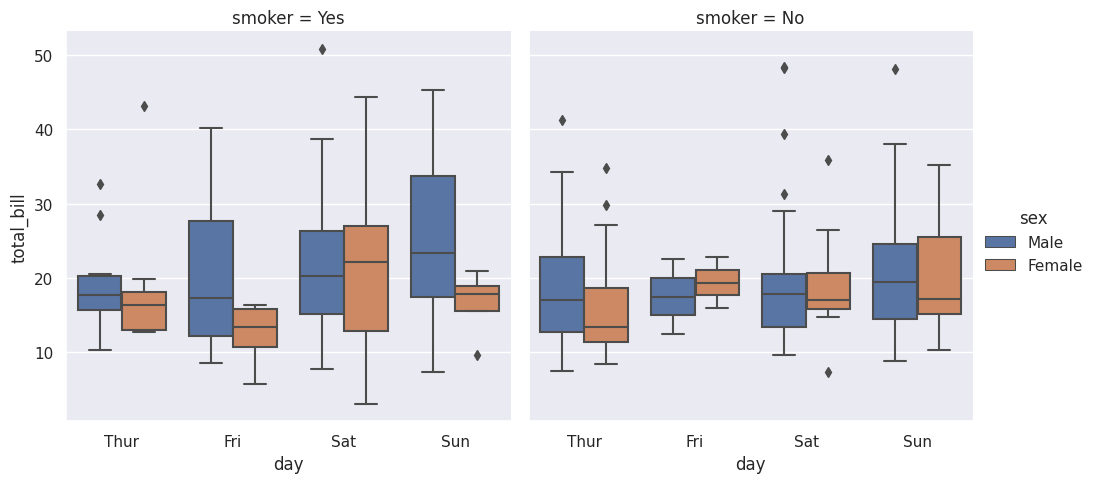

In [34]:
sns.catplot(data=tips, x="day", y="total_bill",hue="sex",dodge=True,kind="box",col="smoker")

plt.show()

note that the first segmentation was in "hue" and the second in "col"

## "Bar plot (count)

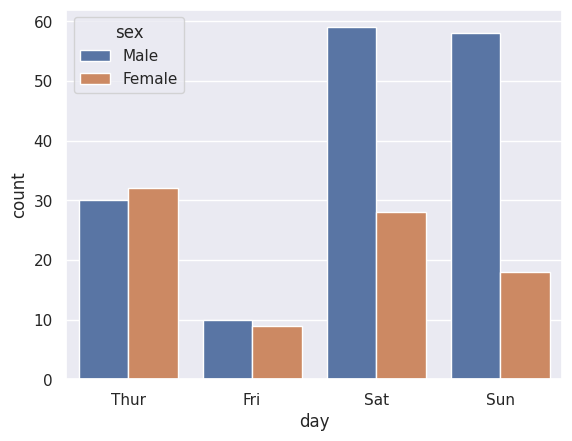

In [35]:
sns.countplot(data = tips, x="day", hue="sex");

## swarm plot(dots diagram)

This chart is similar to stripplot, however, this one shows better the data concentration

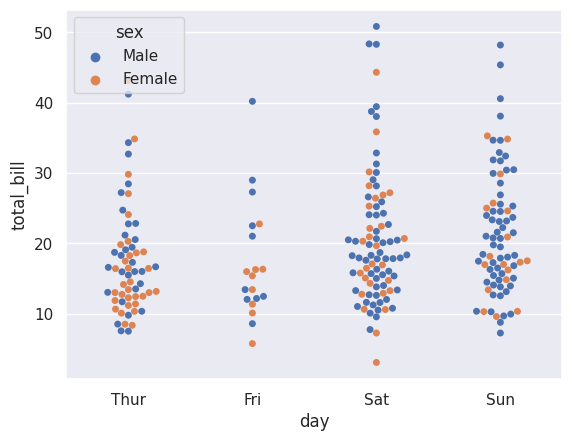

In [36]:
sns.swarmplot(data = tips, x="day", y="total_bill", hue="sex");

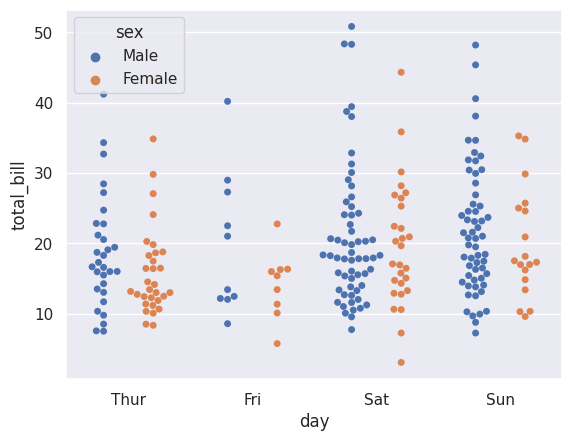

In [37]:
sns.swarmplot(data = tips, x="day", y="total_bill", hue="sex", dodge=True);
#dodge fixes the issue of one category over the other

## stripplot

Looks similar to swarm plot, but data is agglomerated in this case

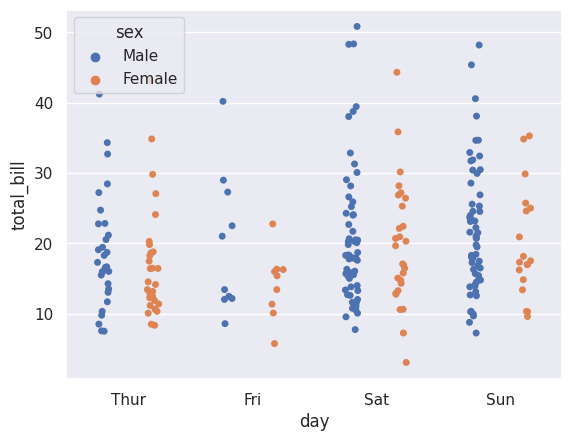

In [38]:
sns.stripplot(data = tips, x="day", y="total_bill", hue="sex", dodge=True);

## boxplot separated categories

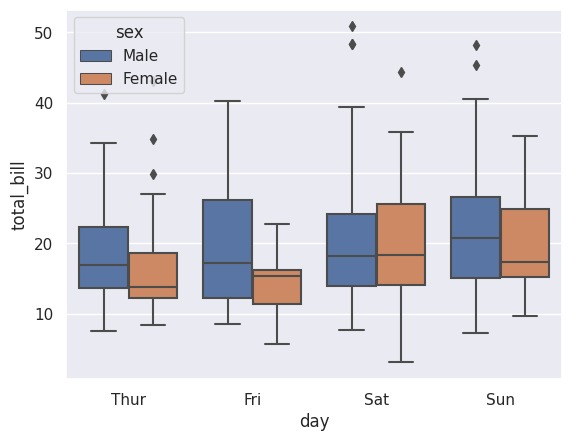

In [39]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex", showfliers=True)     
#i put showfliers argument in case you want to remove outliers

plt.show()

## violin plot

this plot is similar to a boxplot, but does not show quartile. It **shows the data concentration**

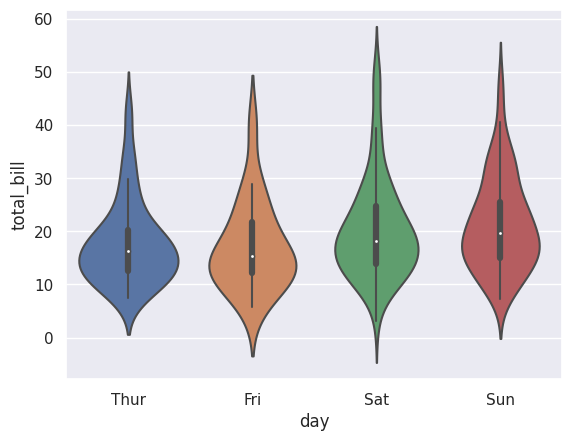

In [40]:
sns.violinplot(data=tips, x="day", y="total_bill")
plt.show()

## Boxplot + Swarmplot

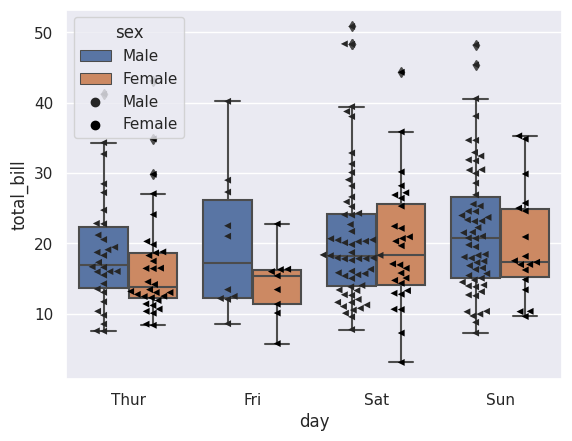

In [41]:
#first chart
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex", dodge=True)

#second chart
sns.swarmplot(data=tips,x="day",y="total_bill",hue="sex", palette='dark:0', dodge=True, marker="<")
#the dodge argument is for the swarm plot to segment by sex

plt.show()

# Correlation charts

The main chart to identify correlations is the scatter chart, this chapter will focus on this

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt 

#data to work on
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## correlation by categories

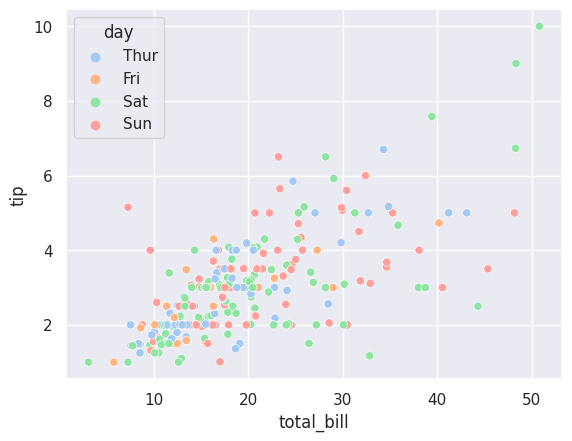

In [43]:
sns.scatterplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="pastel");

## lm plot with multiple categories

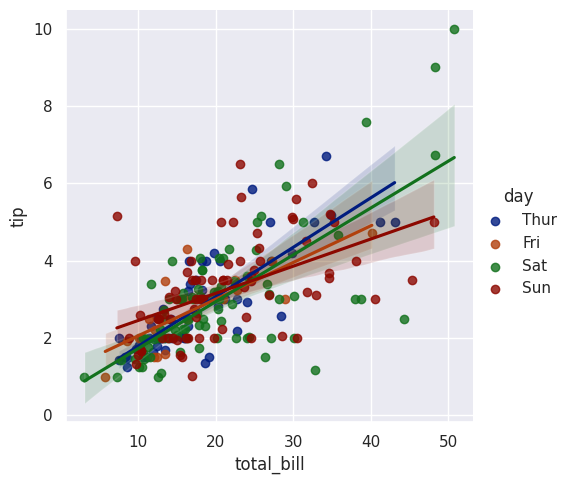

In [44]:
sns.lmplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="dark");

in this chart, it does not look organized because of the data. let's see a usefull case for this chart

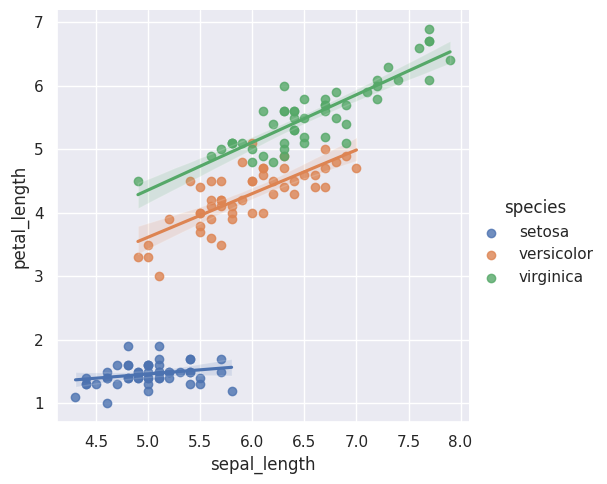

In [45]:
iris = sns.load_dataset("iris")

iris.head()

sns.lmplot(data=iris, x="sepal_length", y="petal_length", hue="species");

## second segmentation in legend

with the argument **style** you can change the dot shape based on another category

### change dot shape

this will also change the dots shape

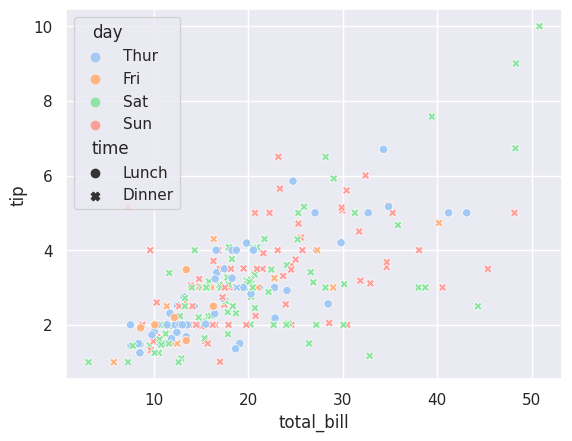

In [46]:
sns.scatterplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="pastel", style="time");

### change dot shape (but you deciding it)

you just have to define a dictionary in which

- **key** is the **variable name**
- **value** is the **dot shape**    *"D" for diamond, "s" for squared, etc.*

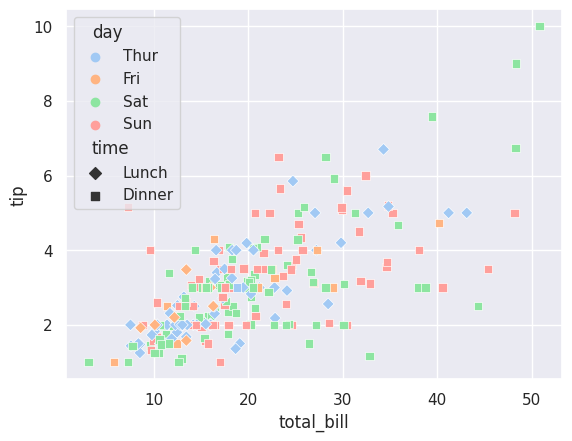

In [47]:
#define the shape dictionary
shapes = { "Lunch":"D", "Dinner":"s"}


sns.scatterplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="pastel", style="time", 
markers=shapes);

## change dot size based on numerical variable

you can change the dots size based on a numerical variable, for example *the dots are bigger if the "size" variable for this dataset is bigger

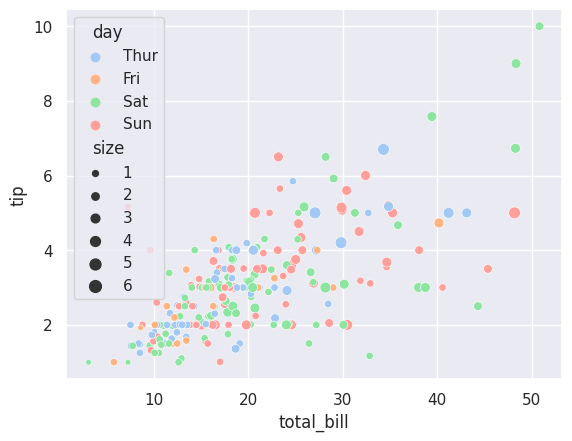

In [48]:
sns.scatterplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="pastel", size="size")

plt.show()

## Multiple correlation charts

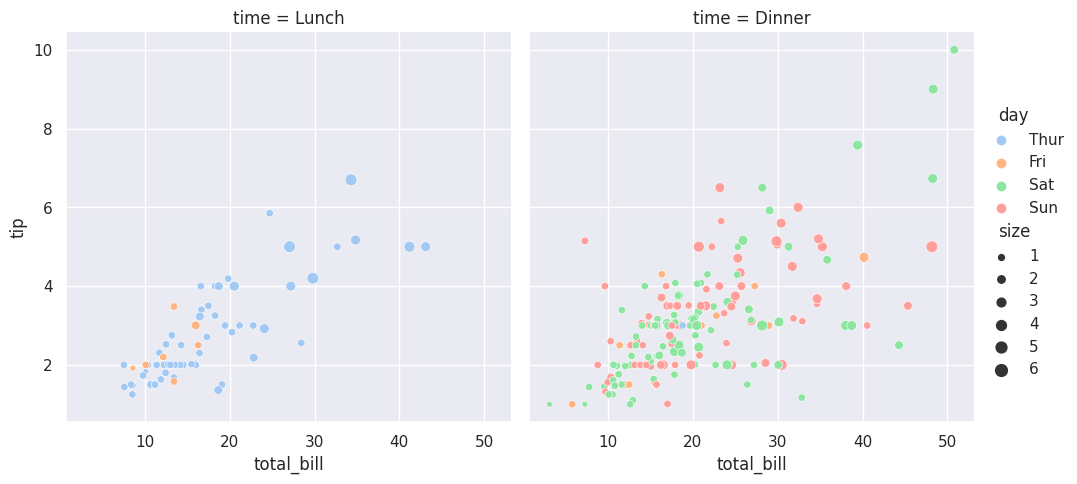

In [49]:
sns.relplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', palette="pastel", size="size", col="time", kind="scatter")

plt.show()

## Move the legend (relocate)

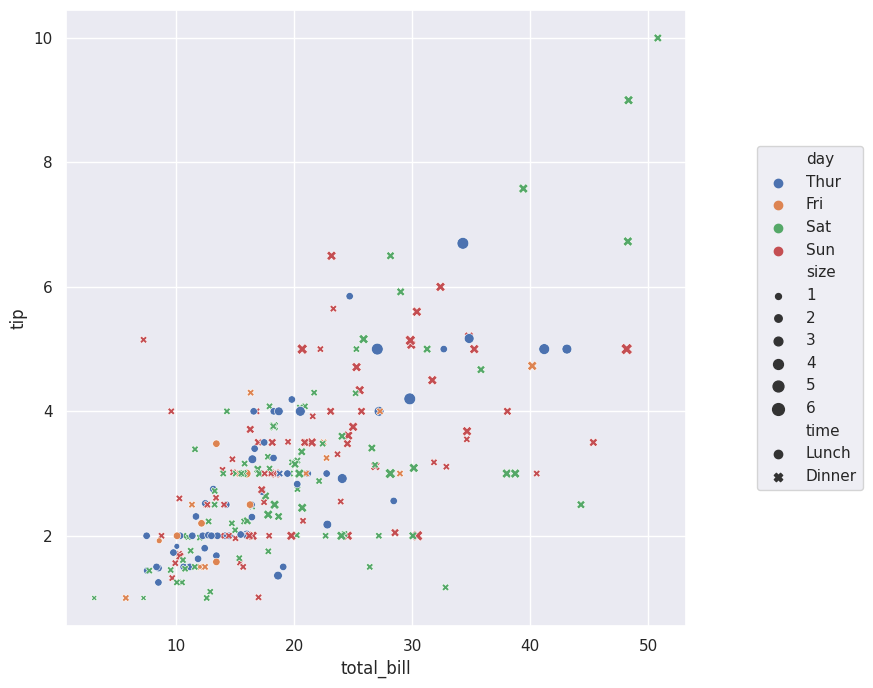

In [50]:
#make the chart bigger
plt.figure(figsize=(8,8))

sns.scatterplot(data= tips, x= 'total_bill', y = 'tip', hue= 'day', style="time", size="size")
plt.legend(loc="center", bbox_to_anchor=(1.2,0.5)) #bbox_to_anchor(xposition, yposition)

plt.show()

## Pairplot (correlation among all the variables)

In [51]:
# see the correlation among the variables
tips.corr() #---> Muestra las variables correlacionadas entre si

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


This function will show you the correlation among all the numeric variables. for this particular dataset, the numeric ones are **["total_bill", "tip", "size"]**

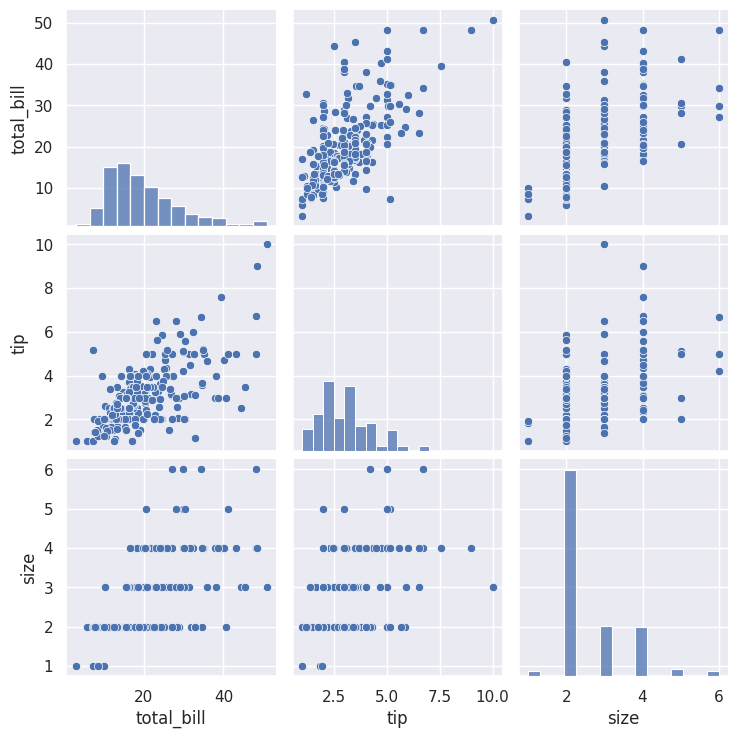

In [52]:
sns.pairplot(data=tips)
plt.show() 

### Pairplot + diag_kind + hue

You can know the correlation among all the variables given a segmentation, and also change the diagonal charts.

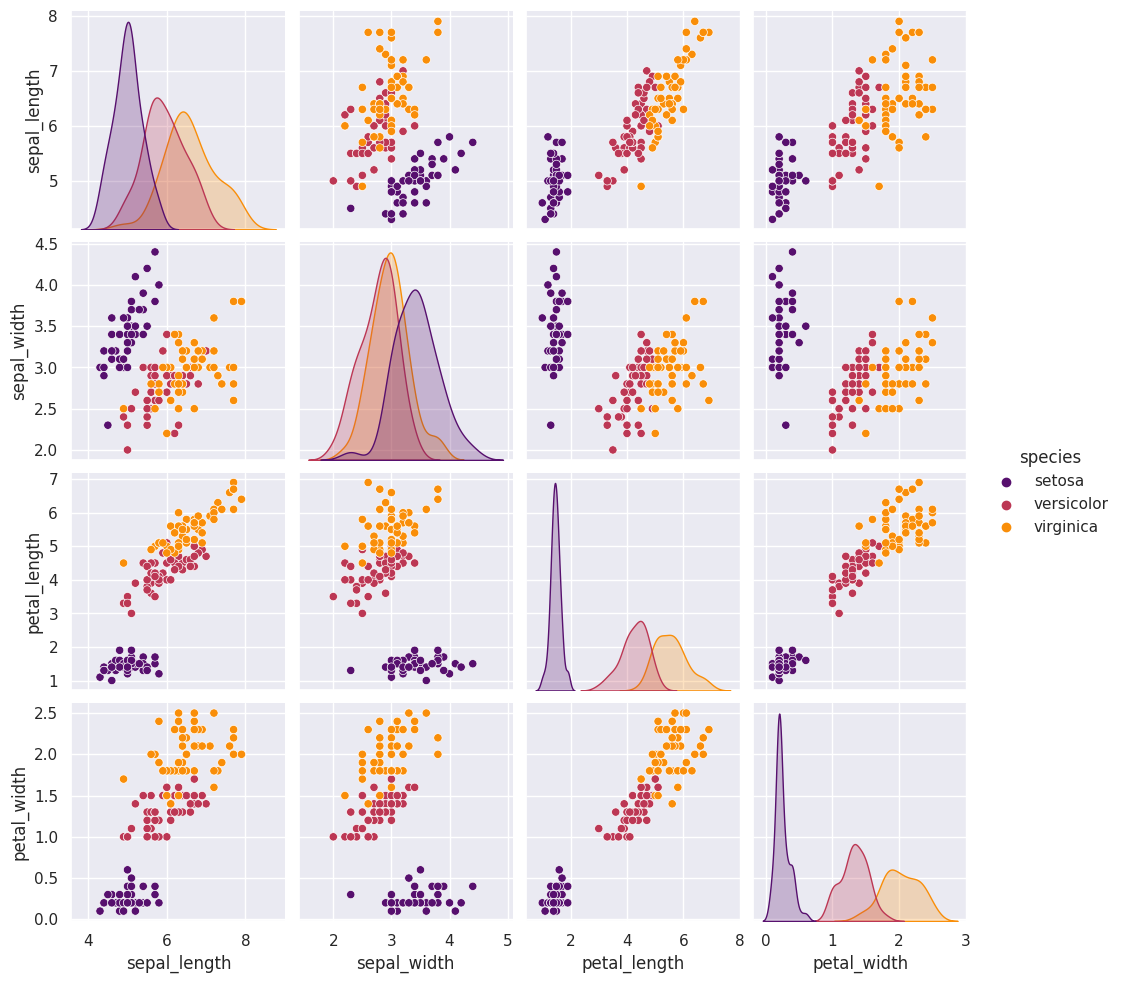

In [58]:
iris = sns.load_dataset("iris")

iris.head()

sns.pairplot(data=iris, hue="species", palette="inferno", diag_kind="kde");

### Pairplot corner

The argument **corner** eliminates the upper diagonal, avoiding repeated charts

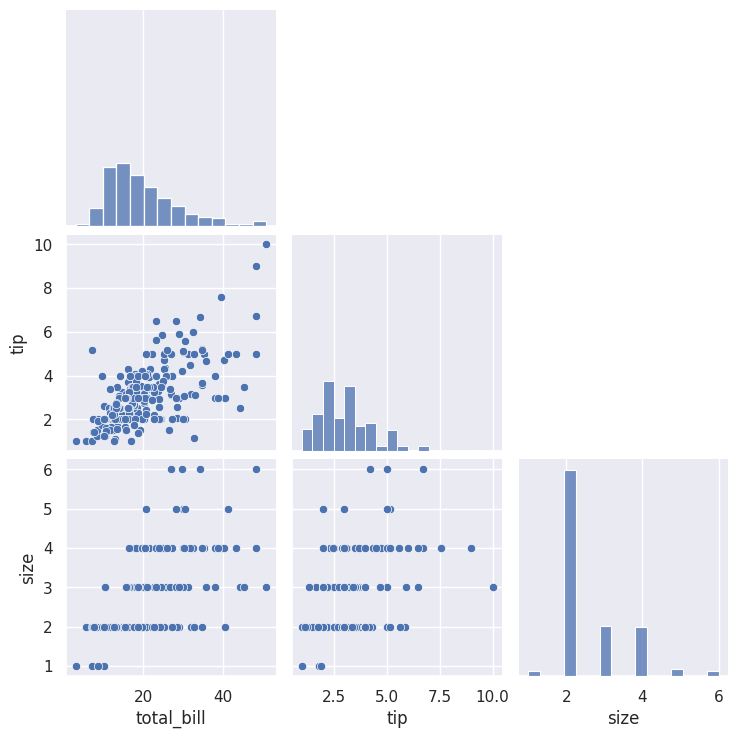

In [54]:
sns.pairplot(data= tips, corner=True);

# Line charts

In [55]:
#loading our data

import seaborn as sns
import matplotlib.pyplot as plt 

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


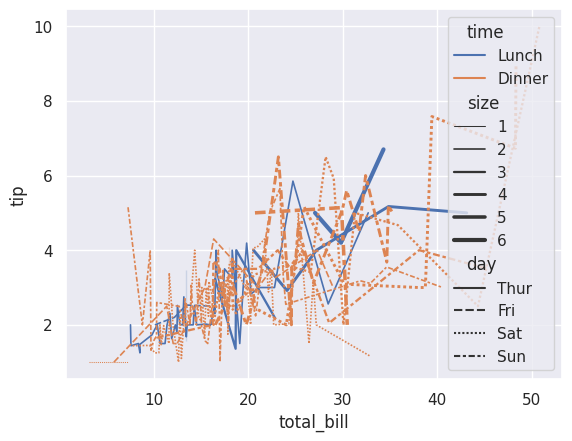

In [56]:
sns.lineplot(data=tips, x="total_bill", y="tip", hue="time", size="size", style="day");

## relplot

you can do the same with relplot and modifying the chart type later on.

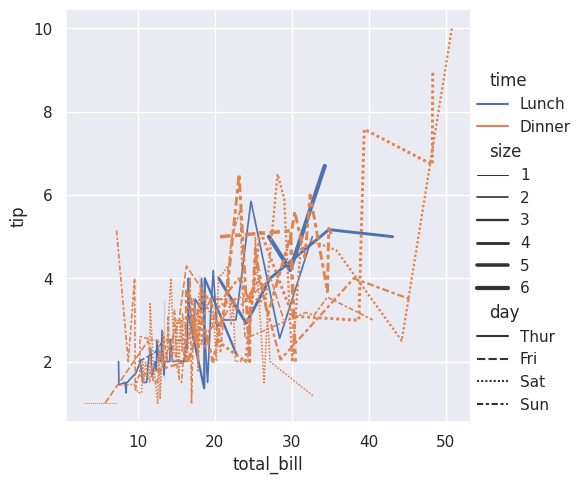

In [57]:
sns.relplot(data= tips, x= 'total_bill', y = 'tip',  hue= 'time', style= 'day', size='size', kind= 'line');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58383767-d720-41ea-a199-0da59b8cd88f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>